<h3>Задание 1</h3>
Импортируйте библиотеки pandas, numpy и matplotlib.<br>
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.<br>
Создайте датафреймы X и y из этих данных.<br>
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки<br>
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.<br>
Масштабируйте данные с помощью StandardScaler.<br>
Постройте модель TSNE на тренировочный данных с параметрами:<br>
n_components=2, learning_rate=250, random_state=42.<br>
Постройте диаграмму рассеяния на этих данных.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [42]:
boston = load_boston()
X, y = pd.DataFrame(boston.data, columns=boston.feature_names), boston.target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [45]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [46]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

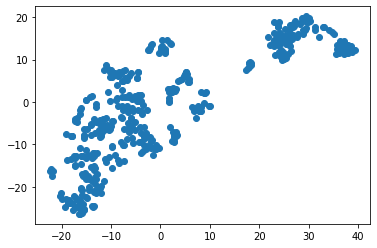

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

<h3>Задание 2</h3>
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,<br>
используйте все признаки из датафрейма X_train.<br>
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.<br>
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,<br>
и раскрасьте точки из разных кластеров разными цветами.<br>
Вычислите средние значения price и CRIM в разных кластерах.<br>

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmean = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels = kmean.fit_predict(X_train_scaled)

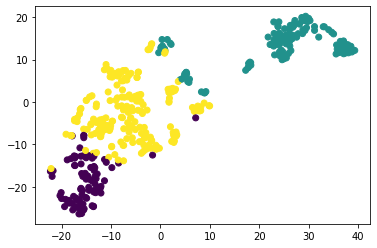

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels)
plt.show()

In [51]:
for i in range(len(np.unique(labels))):
    print(f'Mean price in cluster {i}: {y_train[labels == i].mean()}')

Mean price in cluster 0: 27.78837209302326
Mean price in cluster 1: 16.165354330708663
Mean price in cluster 2: 24.958115183246072


In [52]:
for i in range(len(np.unique(labels))):
    print(f"Mean CRIM in cluster {i}: {X_train['CRIM'][labels == i].mean()}")

Mean CRIM in cluster 0: 0.07356558139534884
Mean CRIM in cluster 1: 10.797028425196851
Mean CRIM in cluster 2: 0.4216602094240837


<h3>*Задание 3</h3>
Примените модель KMeans, построенную в предыдущем задании,<br>
к данным из тестового набора.<br>
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.<br>

In [53]:
test_labels = kmean.predict(X_test_scaled)

In [54]:
for i in range(len(np.unique(test_labels))):
    print(f'Mean price in cluster {i}: {y_test[test_labels == i].mean()}')

Mean price in cluster 0: 31.35
Mean price in cluster 1: 16.43714285714286
Mean price in cluster 2: 21.860784313725492


In [55]:
for i in range(len(np.unique(test_labels))):
    print(f"Mean CRIM in cluster {i}: {X_test['CRIM'][test_labels == i].mean()}")

Mean CRIM in cluster 0: 0.06206
Mean CRIM in cluster 1: 10.165531142857143
Mean CRIM in cluster 2: 0.2660788235294118
